In [25]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../input/archive/winequality-red.csv")

In [3]:

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
np.sort(df.quality.unique())

array([3, 4, 5, 6, 7, 8])

In [7]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5    
}

In [8]:
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [9]:
np.sort(df.quality.unique())

array([0, 1, 2, 3, 4, 5])

In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df_train = df.head(1000)

In [12]:
df_test = df.tail(599)

In [13]:
from sklearn import tree
from sklearn import metrics

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [15]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [17]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [18]:
train_predictions = clf.predict(df_train[cols])

In [19]:
test_predictions = clf.predict(df_test[cols])

In [20]:
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

In [21]:
train_accuracy

0.607

In [22]:
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [23]:
test_accuracy

0.5409015025041736

In [26]:
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

In [28]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [29]:
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

    clf.fit(df_train[cols], df_train.quality)

    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

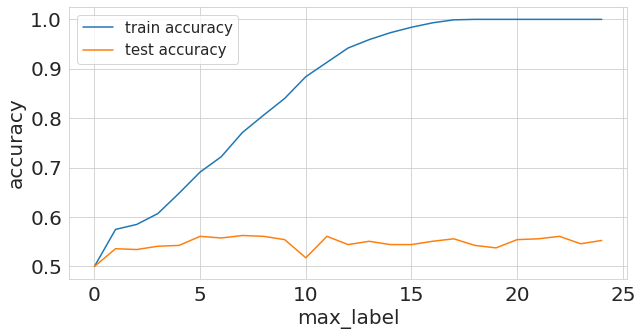

In [30]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')
plt.legend(loc="upper left", prop={"size" : 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_label", size = 20)
plt.ylabel("accuracy", size=20)
plt.show()

In [31]:
from sklearn import model_selection

In [33]:
df['kfold'] = -1

df = df.sample(frac=1).reset_index(drop=True)

y = df.quality.values

kf = model_selection.StratifiedKFold(n_splits=5)

for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

Text(0, 0.5, 'count')

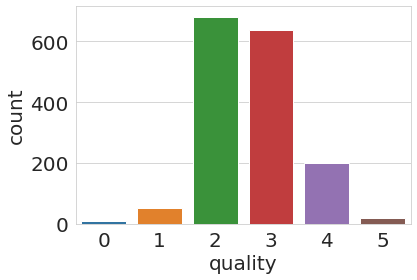

In [37]:
b = sns.countplot(x="quality", data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [38]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

In [39]:
metrics.accuracy_score(l1, l2)

0.625

In [40]:
l1a = np.array(l1)
l2a = np.array(l2)

In [44]:
(l1a == l2a).sum()/len(l1a)

0.625

In [46]:
mnist = pd.read_csv("../input/mnist/train.csv")

In [49]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


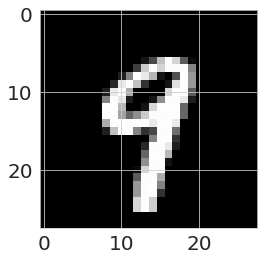

In [73]:
from random import randint
plt.imshow(mnist.iloc[randint(0, len(mnist)), 1:].values.reshape(28, 28), cmap='gray')

/home/yogesh/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


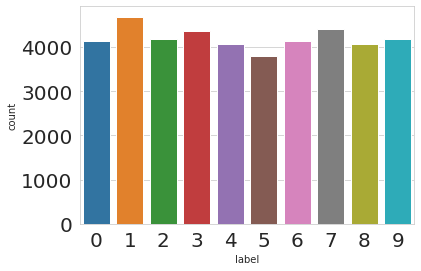

In [74]:
sns.countplot(mnist.label)

In [94]:
df = pd.read_csv("../input/cat_data/train.csv")

In [97]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [96]:
df.ord_2.isna().sum()

0

In [85]:
mapping = {
     'Freezing' : 0, 'Warm' : 1, 'Cold' : 2, 'Boiling Hot' : 3, 'Hot' : 4, 'Lava Hot' : 5
}

In [87]:
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

/home/yogesh/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


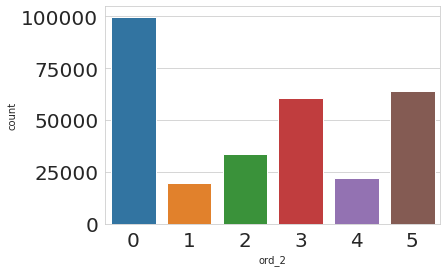

In [93]:
sns.countplot(df.ord_2)

In [98]:
from sklearn import preprocessing

In [99]:
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")

In [100]:
lbl_enc = preprocessing.LabelEncoder()

In [101]:
lbl_enc.fit(df.ord_2.values)

LabelEncoder()

In [102]:
df.loc[:, "ord_2"] = lbl_enc.transform(df.loc[:, "ord_2"])

In [105]:
import numpy as np

In [106]:
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)

In [107]:
example.nbytes

72

In [111]:
from scipy import sparse

In [112]:
sparse_example = sparse.csr_matrix(example)

In [113]:
print(sparse_example.data.nbytes)

32


In [114]:
example = np.random.randint(1000, size=1000000)

In [119]:
ohe = preprocessing.OneHotEncoder( sparse=True)

In [120]:
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

In [121]:
ohe_example.data.nbytes

8000000

In [125]:
ohe_example.indptr.nbytes + ohe_example.data.nbytes + ohe_example.indices.nbytes

16000004

In [126]:
df.groupby(['ord_2'])['id'].count()

ord_2
0    60627
1    33768
2    99816
3    22227
4    63908
5    19654
Name: id, dtype: int64

In [127]:
df.groupby(
    [
        'ord_1',
        'ord_2'
    ]
)['id'].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,0,8692
1,Contributor,1,4842
2,Contributor,2,14284
3,Contributor,3,3122
4,Contributor,4,9074
5,Contributor,5,2857
6,Expert,0,4980
7,Expert,1,2850
8,Expert,2,8432
9,Expert,3,1887


In [128]:
import os
import gc
import joblib
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing
import torch
from torch import layers
import torch.nn as nn


ImportError: cannot import name 'layers' from 'torch' (/home/yogesh/anaconda3/envs/ml/lib/python3.7/site-packages/torch/__init__.py)

In [129]:
import numpy as np
from sklearn import impute

X = np.random.randint(1, 15, (10, 6))

In [130]:
X = X.astype(float)

In [132]:
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan

In [133]:
X

array([[nan,  7.,  8.,  4.,  9., 12.],
       [13.,  2., 14.,  7., nan, 14.],
       [ 8., nan,  3.,  1.,  9.,  9.],
       [ 4., nan, nan, 14.,  3.,  1.],
       [13., 12.,  6., 14., 10.,  7.],
       [nan, 13.,  9., 14.,  6., 12.],
       [ 2., nan,  5.,  8., 11.,  3.],
       [10.,  4.,  7.,  9., 11.,  8.],
       [ 4., nan, nan,  9., nan,  7.],
       [ 8.,  2., 12., 12.,  4.,  7.]])

In [134]:
knn_imputer = impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)

array([[ 9. ,  7. ,  8. ,  4. ,  9. , 12. ],
       [13. ,  2. , 14. ,  7. , 10. , 14. ],
       [ 8. ,  5.5,  3. ,  1. ,  9. ,  9. ],
       [ 4. ,  7. ,  8.5, 14. ,  3. ,  1. ],
       [13. , 12. ,  6. , 14. , 10. ,  7. ],
       [ 8.5, 13. ,  9. , 14. ,  6. , 12. ],
       [ 2. ,  5.5,  5. ,  8. , 11. ,  3. ],
       [10. ,  4. ,  7. ,  9. , 11. ,  8. ],
       [ 4. ,  3. ,  8.5,  9. ,  7.5,  7. ],
       [ 8. ,  2. , 12. , 12. ,  4. ,  7. ]])

In [135]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.1)

In [136]:
from sklearn.datasets import fetch_california_housing

In [137]:
data = fetch_california_housing()

In [140]:
X = data['data']

col_names = data['feature_names']

In [141]:
y = data['target']

In [144]:
df = pd.DataFrame(X, columns=col_names)

In [145]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [146]:
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)

In [147]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.885342
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.881215
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.693956
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2.375521
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.961173


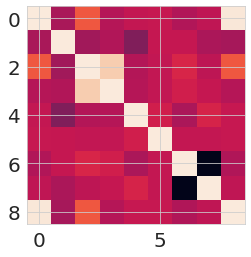

In [151]:
plt.imshow(df.corr())

In [152]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


# Feature selection

In [153]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [154]:
class UnivariateFeatureSelection:
    def __init__(self, n_features, problem_type, scoring):
        
        if problem_type == "classification":
            valid_scoring = {
                "f_classif" : f_classif,
                "chi2" : chi2,
                "mutual_info_classif" : mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression" : f_regression,
                "mutual_info_regression" : mutual_info_regression
            }
        
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
        
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features*100)
            )
        else:
            raise Exception("Invalid number of features")

    def fit(self, X, y):
        return self.selection.fit(X, y)

    def transform(self, X):
        return self.selection.transform(X)

In [155]:
ufs = UnivariateFeatureSelection(
    n_features=0.1,
    problem_type="regression",
    scoring="f_regression"
)

In [156]:
ufs.fit(X, y)

SelectPercentile(score_func=<function f_regression at 0x7930945578c0>)

In [157]:
ufs.transform(X)

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [158]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification

In [ ]:
from typing import Any


class GreedyFeatureSelection:

    def evaluate(self, X, y):
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        prediction = model.predict(X)[:, 1]
        auc = metrics.roc_auc_score(y, prediction)
        return auc
    
    def _feature_selection(self, X, y):
        
        good_features = []
        best_score = []

        num_features = X.shape[1]

        while True:
            this_features = None

            best_score = 0

            for feature in range(num_features):
                if feature in good_features:
                    continue

                selected_features = good_features + [feature]

                xtrain = X[:, selected_features]

                score = self.evaluate_score(xtrain, y)

                if score > best_score:
                    this_features = feature
                    best_score = score
                
                if this_features != None:
                    good_features.append(this_features)
                    best_score.append(best_score)

                
                if len(best_score) > 2:
                    if best_score[-1] < best_score[-2]:
                        break

    def __call__(self, X, y):
        scores, features = self._feature_selection(X, y)

        return X[:, features], scores
    

    

if __name__ == "__main__":

    X, y = make_classification(n_samples=1000, n_features=100)

    X_transformed, scores = GreedyFeatureSelection()(X, y)

    print(X_transformed.shape, scores)